# Homework #4

**See Canvas for HW #4 assignment due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the class scanning policy in the syllabus. Please do not turn in messy work. Computational problems should be completed in this notebook (using the `R` kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 


## A. Theoretical Problems

## A.1 The median of the exponential distribution


- In class, we defined the mean of a random variable $X$ with probability density function $f(x)$ to be $E[X] = \int^{\infty}_{-\infty}xf(x) dx$. 

- We also defined the median of a random variable $X$ with probability density function $f(x)$ to be the value $m$ such that $P(X \le m) = 0.5$.

The exponential distribution has a density function $$f(x) = \lambda e^{-\lambda x},$$ for $x \ge 0$, where $\lambda > 0$ is the rate parameter. We showed in class that if $X \sim Exp(\lambda)$, then $E[X] = \frac{1}{\lambda}$.

**A.1(a) [5 points] Let $\lambda = 1$. Prove that the median of $X \sim Exp(1)$ is $\log(2)$ (on this problem, the notation $\log(\cdot)$ denotes the natural logarithm).**

**A.1(b) [5 points] Let $\lambda = 2$. Prove that the median of $X \sim Exp(2)$ is $\frac{\log(2)}{2}$.**

**A.1(c) [7 points] Prove that for $X \sim Exp(\lambda)$, the median is given by $\frac{\log(2)}{\lambda}$**

## A.2 [8 points] Expected values and bets

**Let $X =$ the outcome when a fair die is rolled once. Suppose that, before the die is rolled, you are offered a choice:** 

*Option 1: a guarantee of $1/4$ dollars (whatever the outcome of the roll)*

*Option 2: $h(X) = 1/X$ dollars. Which option would you prefer?* 

**Justify your answer.**

## A.3 [8 points] More fraud

Recall the random variable from the previous homework: $X$ is the leading digit of a randomly selected number from a large accounting ledger. The PMF was defined by:
$$ P(X=x) = f(x) = \log_{10}\left(\frac{x+1}{x}\right), \quad x=1,2,...,9. $$


**Give an expression for $E[X]$, and then calculate it in `R`.**

In [5]:
pmf <- function(x) {
  return(log10((x + 1) / x))
}
E_X<- sum(1:9 * pmf(1:9))
E_X

[1] 3.440237

## A.4 Mixture distributions

Most of the distributions we've looked at so far have been unimodal, flat, or monotonically increasing/decreasing. Let's take a look at a class of distributions that are multimodal.

Let $X_1,...,X_n$ be continuous random variables with PDFs $f_{X_i}(x)$, $i = 1,...,n$. Define a *mixture distribution* to be a random variable $X$ with pdf

\begin{align*}
f_X(x) = \sum^n_{i=1}\alpha_i f_{X_i}(x) 
\end{align*}

where $\alpha_i$ are nonnegative real numbers such that $\sum^n_{i=1}\alpha_1 = 1$. You can think of $f_X(x)$ as being a weighted average of the PDFs $f_{X_i}(x)$.

**A.4(a) [6 points] Show that $f_X(x)$ is a PDF.**

**A.4(b) [6 points] Find the expected value of $X$.**

**A.4(c) [6 points] [*Optional for STAT 4000 students*] Show that**

$$\displaystyle Var[X] = \left(\sum^n_{i=1}\alpha_i\left(\sigma^2_i + \mu_i^2 \right)\right) - \mu^2,$$

**where $\sigma^2_i = Var[X_i]$, $\mu_i = E[X_i]$, and $\mu = E[X]$ (note that the $\mu^2$ is outside the summation).**

HINT: Use the fact that, for a random variable $Y$, $Var[Y] = E[Y^2] - [E(Y)]^2$ (it may be helpful at some point to re-arrange these terms).

# B Computational problems

## B.1 Monte Carlo estimation

One really cool (and useful!) application of random variables is approximating integrals/the area under a curve. Consider $f(x) = sin(x)$ on the interval $0 \le x \le \pi$. Let's use uniform random variables to approximate the area under $f(x)$ on this interval. Note that this general idea is used often to solve really important but hard integrals.

 
**B.1(a) [6 points] By hand, and using the `integrate()` function in `R`, calculate the true area under $f(x)$.**


In [9]:
fn = function(x) {
  sin(x)
}
integ_val = integrate(fn, 0, pi)
integ_val$value


[1] 2

**B.1(b) [3 points] Generate $n = 5,000$ uniform random $(x,y)$ coordinates in the rectangle $x \in [0,\pi], \, y \in [0,1]$.**

In [18]:
n = 5000
x = runif(n, 0, pi)
y = runif(n, 0, 1) 

dist_points = data.frame(x,y)
head(dist_points)

x,y
0.8606168,0.7690353
1.6813567,0.9585164
1.9931374,0.5511703
2.4864047,0.9820963
2.6679696,0.3561905
2.1855998,0.4559417


**B.1(c)  [6 points] Calculate the proportion of points from B.1(b) that fall below $f(x)$ and use this proportion to approximate the area under $f(x)$.**

In [15]:
f_x = sin(x)
points_und_curve  = y<=f_x
prop = sum(points_und_curve)/n
approx = prop * pi
print(approx)

[1] 1.974805


The approx gives the approximate of proportion of points which lies under the curve. 

**B.1(d) [4 points] Find the absolute difference between our approximation and the true area calculated in B.1(a). How can we make this error smaller?**

In [20]:
absolute_difference = abs(integ_val$value - approx)
absolute_difference

[1] 0.02519486

On increasing the number of points 'n', the error (absolute_difference) decreases and it will get equal to the true area value(integ_val$value).

## B.2

For this problem, let's assume that the probability of an event $E$, $P(E)$, means something like "the degree to which you believe $E$".

**B.2(a) [8 points] Plot the PDFs of four different Beta distributions:**
                                  
1. Beta$(1, 1)$
2. Beta$(0.5, 0.5)$
3. Beta$(5, 5)$
4. Beta$(1, 5)$

**What is another name for Beta$(1, 1)$?**

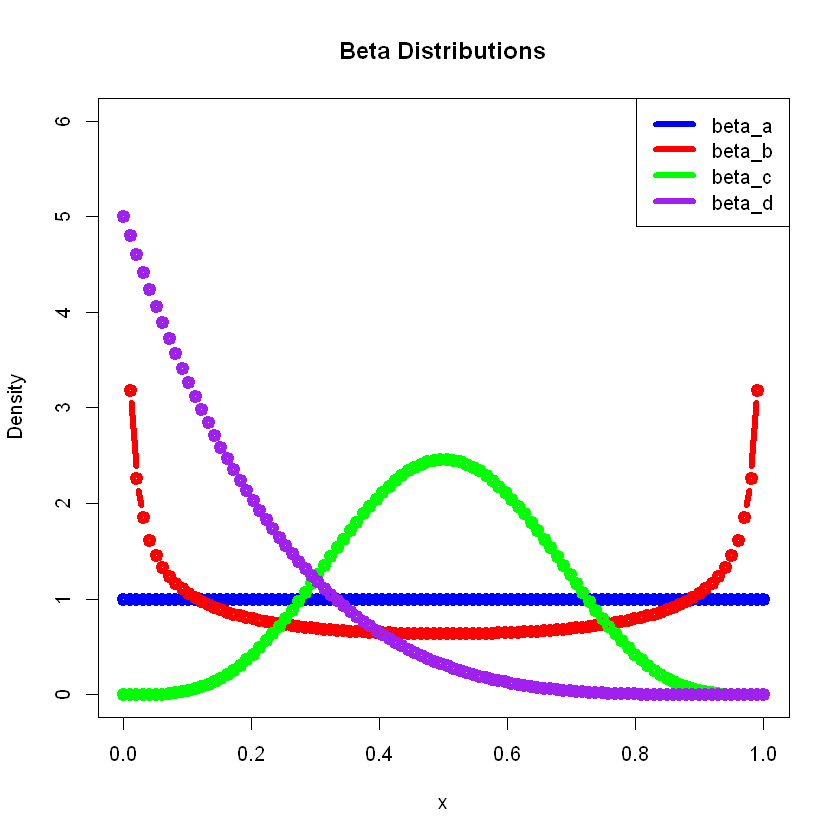

In [45]:
x <- seq(0, 1, length.out = 100)

beta_a <- dbeta(x, 1, 1)
beta_b <- dbeta(x, 0.5, 0.5)
beta_c <- dbeta(x, 5, 5)
beta_d <- dbeta(x, 1, 5)

plot(x, beta_a, type = "b", col = "blue", lwd = 5, ylim = c(0, 6), 
     ylab = "Density", xlab = "x", main = "Beta Distributions")
lines(x, beta_b, type = "b" , col = "red", lwd = 5)
lines(x, beta_c, type = "b", col = "green", lwd = 5)
lines(x, beta_d, type = "b", col = "purple", lwd = 5)

legend("topright", legend = c("beta_a", "beta_b", "beta_c", "beta_d"), col = c("blue", "red", "green", "purple"), lwd = 5)


The another name for Beta(1,1) is the Uniform(0,1)

**B.2(b) [8 points] Now, suppose your friend has a coin whose probabilities are unknown to you. Since the beta distribution has support $[0,1]$, it is well-suited to model your beliefs about the probability of heads. Match the following descriptions with the beta distributions from the previous part.**


i. I am pretty confident that this is a two-headed or two-tailed coin.

ii. I have no idea what the probability of heads is.

iii. I believe that the probability of heads is low.

iv. I believe that the coin is close to fair.

 - i. beta_b ie. Beta[0.5,0.5]
 - ii. beta_a ie. Beta[1,1]
 - iii. beta_d ie. Beta[1,5]
 - iv. beta_c ie. Beta[5,5]

## B.3 Mixture distributions

Most of the distributions we've looked at so far have been unimodal, flat, or monotonically increasing/decreasing. Let's take a look at a class of distributions that are multimodal. You proved some results about these in problem **A.4**, but recall the definition:

Let $X_1,...,X_n$ be continuous random variables with pdfs $f_{X_i}(x)$, $i = 1,...,n$. Define a *mixture distribution* to be a random variable $X$ with PDF

\begin{align*}
f_X(x) = \sum^n_{i=1}\alpha_i f_{X_i}(x) 
\end{align*}

where $\alpha_i$ are nonnegative real numbers such that $\sum^n_{i=1}\alpha_1 = 1$.

**B.3(a) [8 points] For this question, let's create a specific mixture distribution and plot the PDF in R.**

1. First, create a grid of `n = 100` `x` values evenly spaced between `0` and `15`.
2. Construct an `alpha` vector with entries `1/5`, `2/5`, and `2/5`.
3. At each value of `x`, calculate the following:
    - the PDF of an exponential with rate parameter `1`.
    - the PDF of a normal distribution with mean `5` and standard deviation `1`.
    - the PDF of a normal distribution with mean `10` and standard deviation `2`.
4. Construct the PDF of the mixture random variable using `alpha` and PDFs from 3.
5. Plot the pdf of the mixture distribution. What do you notice about it's shape? How does the shape relate to the shape of the original distributions?

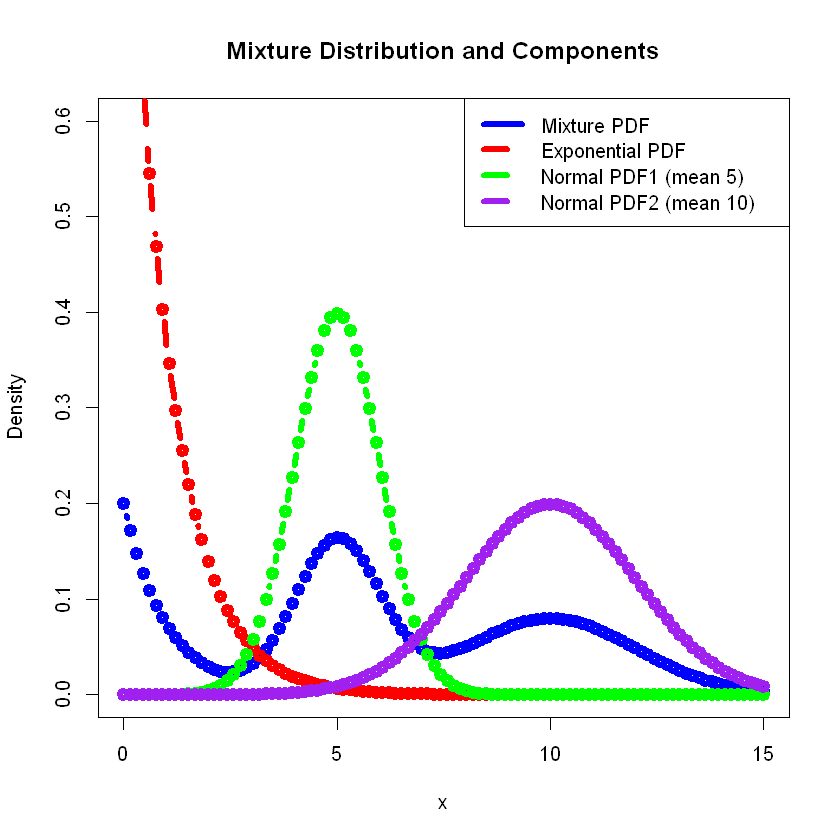

In [48]:
n = 100
x = seq(0, 15, length.out = n)
alpha = c(1/ 5, 2/5, 2/5)
exponential_dist_pdf  = dexp(x,rate = 1)
normal_dist_pdf1 = dnorm(x, mean = 5, sd = 1)
normal_dist_pdf2 = dnorm(x, mean = 10, sd = 2)
mixture_dist_pdf = alpha[1]*exponential_dist_pdf + alpha[2]*normal_dist_pdf1 + alpha[3]*normal_dist_pdf2
# Plot the mixture distribution
plot(x, mixture_dist_pdf, type = "b", col = "blue", lwd = 5, ylim = c(0, 0.6), 
     ylab = "Density", xlab = "x", main = "Mixture Distribution and Components")

# Plot the individual PDFs
lines(x, exponential_dist_pdf, type = "b", col = "red", lwd = 5, lty = 2)  # Exponential PDF
lines(x, normal_dist_pdf1,type = "b", col = "green", lwd = 5, lty = 2)  # Normal PDF (mean 5)
lines(x, normal_dist_pdf2, type = "b", col = "purple", lwd = 5, lty = 2)  # Normal PDF (mean 10)

# Add a legend
legend("topright", legend = c("Mixture PDF", "Exponential PDF", "Normal PDF1 (mean 5)", "Normal PDF2 (mean 10)"),
       col = c("blue", "red", "green", "purple"), lwd = 5, lty = c(1, 2, 2, 2))

Here the plot of mixed distribution has a multimodal mixed shape which has the shape of Exponential(peaks near 0), Normal 1(peaks at 5) and Normal 2(peaks at 10) [Generally the normal distribution peaks will be at it's mean]. 

**B.3(b) [8 points] In this part, generate $m = 50,000$ random numbers from the mixture distribution that we worked with in B.3(a), and store those numbers in a vector `v`. The algorithm below should help!**

1. Generate a single random number from the continuous uniform distribution $U(0,1)$. Call this number `u`. 
2. Use `u` to select among the three distributions from B.3(a) (i.e., $Exp(1)$, $N(5,1)$ or $N(10,2)$). For example, generate a random number from $Exp(1)$ if `u < 1/5`.  
2. Repeat this process `m = 50,000` times.

Then, create a histogram of `v`, and set `breaks = 30`. What do you notice about the distribution?

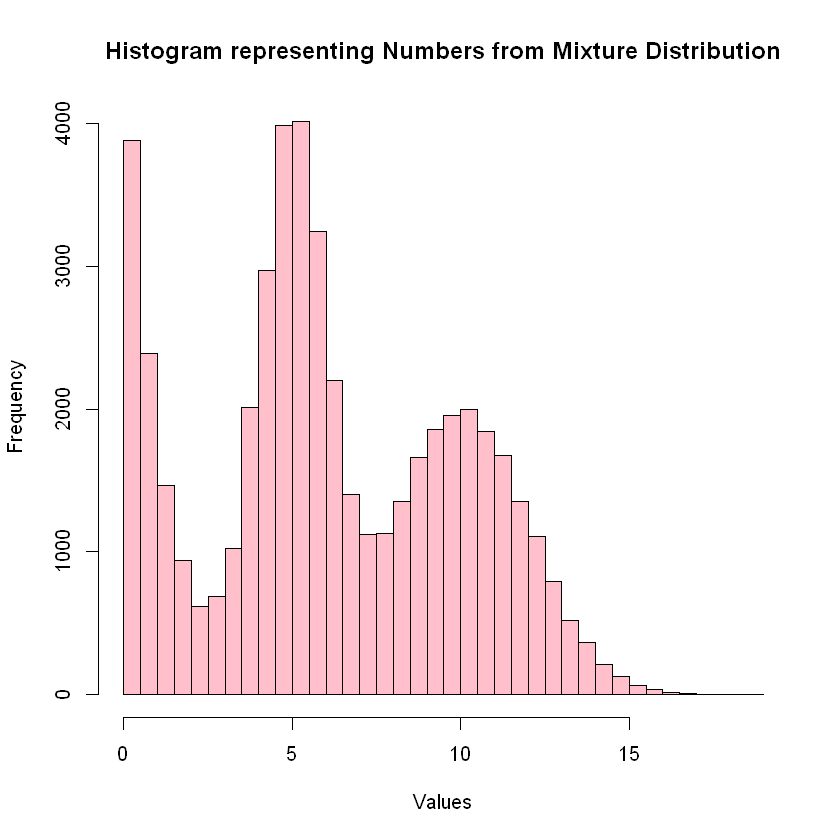

In [6]:
m = 50000
v = numeric(m)
probs = c(1/5, 2/5, 2/5)
for (i in 1:m) {

  dist_index = sample(1:3, size = 1, prob = probs)
  
  if (dist_index == 1) {
    v[i] = rexp(1, rate = 1) 
  } else if (dist_index == 2) {
    v[i] = rnorm(1, mean = 5, sd = 1)  
  } else {
    v[i] = rnorm(1, mean = 10, sd = 2) 
  }
}
hist(v, breaks = 30, main = "Histogram representing Numbers from Mixture Distribution", 
     xlab = "Values", ylab = "Frequency", col = "pink", border = "black")
# lines(density(v), col = "red", lwd = 5)

I'm noticing the multimodal distribution here, Where I noticed a peak at '0' because of the exponential distribution's function, noticed a peak at '5' because of normal distribution 1 and noticed a peak at '10 because of the normal distribution 2.
The overall distribution reflects the mixture of three different distributions. 

**B.3(c) [4 points] Compute the theoretical mean and variance for this mixture, i.e., $E[X]$ and $Var[X]$ from the formulas in Problem A.4. Then, compare those values to the sample mean and variance of `v`. What do you notice?**

In [7]:
alpha = c(1/5, 2/5, 2/5) 

mean_exp = 1    
mean_norm1 = 5    
mean_norm2 = 10   

var_exp = 1^2  
var_norm1 = 1^2  
var_norm2 = 2^2  

t_mean = alpha[1]*mean_exp + alpha[2]*mean_norm1 + alpha[3]*mean_norm2
cat("Theoretical Mean: ", t_mean, "\n")

t_variance = alpha[1]*(var_exp + mean_exp^2) + 
                       alpha[2]*(var_norm1 + mean_norm1^2) + 
                       alpha[3]*(var_norm2 + mean_norm2^2) - t_mean^2
cat("Theoretical Variance: ", t_variance, "\n")

s_mean = mean(v)
s_variance = var(v)

# Print the sample mean and variance
cat("Sample Mean: ", s_mean, "\n")
cat("Sample Variance: ", s_variance, "\n")


Theoretical Mean:  6.2 
Theoretical Variance:  13.96 
Sample Mean:  6.214352 
Sample Variance:  14.00508 


Here, the both the theoretical mean and the sample mean are almost the same because here the number of iterations are 50,000 and as the 'n' is large we'll get the sample mean and theoretical mean closer to same.

Here, both the theoretical variance and sample variance are also almost similar due to the larger iterations if the n value is lower we might have seen a larger difference.